# Census Data

All data is from a census data package supported on [GitHub](https://github.com/jtleider/censusdata). Unfortunatley this may be a short-term solution because the package is no longer being supported on GitHub so we may have to find a more long-term solution in the future. For this project, we are using basic demographics so I have found data on sex, age, race, employment status, number of housing units, income, language spoken at home, heatlh insurance status, poverty status. All data is at the census tract level and is either the total count or the average for the tract. The data used for the project is the ACS 5-year from 2018.

## Importing CensusData and Packages

In [1]:
pip install censusdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import censusdata
import geopandas as gpd
from geopandas import GeoDataFrame

## Searching State & County Numbers

In [3]:
#finding state number
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)
print(states['Minnesota'])

Summary level: 040, state:27


In [4]:
#finding county number
counties = censusdata.geographies(censusdata.censusgeo([('state', '27'), ('county', '*')]), 'acs5', 2018)
print(counties['Hennepin County, Minnesota'])

Summary level: 050, state:27> county:053


## Searching Census Tables

Table codes were found on the Census Data Tables [site](https://data.census.gov/cedsci/all?d=ACS%205-Year%20Estimates%20Detailed%20Tables).

In [5]:
sex_by_age = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01001')) #age & sex data

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

In [6]:
race = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B02001')) #total race data

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | RACE                           | !! Estimate Total                                        | int  
B02001_002E  | RACE                           | !! !! Estimate Total White alone                         | int  
B02001_003E  | RACE                           | !! !! Estimate Total Black or African American alone     | int  
B02001_004E  | RACE                           | !! !! Estimate Total American Indian and Alaska Native a | int  
B02001_005E  | RACE                           | !! !! Estimate Total Asian alone                         | int  
B02001_006E  | RACE                           | !! !! Estimate Total Native Hawaiian and Other Pacific I | int  
B02001_007E  | RACE                           | !! !! Estimate Total Some other race alone   

In [7]:
employment_status = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B23025')) #total population and working population

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B23025_001E  | EMPLOYMENT STATUS FOR THE POPU | !! Estimate Total                                        | int  
B23025_002E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total In labor force                      | int  
B23025_003E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total In labor force Civilian labor fo | int  
B23025_004E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total In labor force Civilian labor | int  
B23025_005E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total In labor force Civilian labor | int  
B23025_006E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total In labor force Armed Forces      | int  
B23025_007E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total Not in labor force      

In [8]:
housing_units = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B25001')) #number of housing units/tract

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25001_001E  | HOUSING UNITS                  | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


In [9]:
income = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B19301')) #PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19301_001E  | PER CAPITA INCOME IN THE PAST  | !! Estimate Per capita income in the past 12 months (in  | int  
-------------------------------------------------------------------------------------------------------------------


In [10]:
language_athome = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B16007')) #language spoken at home

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B16007_001E  | AGE BY LANGUAGE SPOKEN AT HOME | !! Estimate Total                                        | int  
B16007_002E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! Estimate Total 5 to 17 years                       | int  
B16007_003E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! !! Estimate Total 5 to 17 years Speak only English | int  
B16007_004E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! !! Estimate Total 5 to 17 years Speak Spanish      | int  
B16007_005E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! !! Estimate Total 5 to 17 years Speak other Indo-E | int  
B16007_006E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! !! Estimate Total 5 to 17 years Speak Asian and Pa | int  
B16007_007E  | AGE BY LANGUAGE SPOKEN AT HOME | !! !! !! Estimate Total 5 to 17 years Speak o

In [11]:
health_insurance = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B27001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B27001_001E  | HEALTH INSURANCE COVERAGE STAT | !! Estimate Total                                        | int  
B27001_002E  | HEALTH INSURANCE COVERAGE STAT | !! !! Estimate Total Male                                | int  
B27001_003E  | HEALTH INSURANCE COVERAGE STAT | !! !! !! Estimate Total Male Under 6 years               | int  
B27001_004E  | HEALTH INSURANCE COVERAGE STAT | !! !! !! !! Estimate Total Male Under 6 years With healt | int  
B27001_005E  | HEALTH INSURANCE COVERAGE STAT | !! !! !! !! Estimate Total Male Under 6 years No health  | int  
B27001_006E  | HEALTH INSURANCE COVERAGE STAT | !! !! !! Estimate Total Male 6 to 18 years               | int  
B27001_007E  | HEALTH INSURANCE COVERAGE STAT | !! !! !! !! Estimate Total Male 6 to 18 years

In [12]:
poverty = censusdata.printtable(censusdata.censustable('acs5', 2018, 'B17001')) #last 12 months

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17001_001E  | POVERTY STATUS IN THE PAST 12  | !! Estimate Total                                        | int  
B17001_002E  | POVERTY STATUS IN THE PAST 12  | !! !! Estimate Total Income in the past 12 months below  | int  
B17001_003E  | POVERTY STATUS IN THE PAST 12  | !! !! !! Estimate Total Income in the past 12 months bel | int  
B17001_004E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_005E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_006E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_007E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past

## Choosing Variables within Census Tables

In [13]:
sex_by_age_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B01001_001E', 'B01001_002E', 'B01001_026E'])

sex_by_age_tract = sex_by_age_hennepin.rename(columns={'B01001_001E': 'Total_Count', 
                                                    'B01001_002E': 'Male_Count', 
                                                    'B01001_026E': 'Female_Count'})
sex_by_age_tract

,Total_Count,Male_Count,Female_Count
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",10065,4961,5104
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",3840,1992,1848
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4467,2382,2085
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",4084,2265,1819
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2998,1588,1410
...,...,...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",3579,1473,2106
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",6212,3296,2916
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",4805,2425,2380
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",1959,897,1062


In [14]:
race_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E'])

race_tract = race_hennepin.rename(columns={'B02001_001E': 'Total_Race', 
                                        'B02001_002E': 'White_Count', 
                                        'B02001_003E': 'Black_Count',
                                        'B02001_004E': 'AmIndian_Count',
                                        'B02001_005E': 'Asian_Count',
                                        'B02001_006E': 'NativeHI_Count',
                                        'B02001_007E': '1RaceOther_Count',
                                        'B02001_008E': '2RaceOther_Count',
                                        'B02001_009E': '2+RaceInc_Count',
                                        'B02001_010E': '2+RaceExc_Count'})
race_tract.head()

,Total_Race,White_Count,Black_Count,AmIndian_Count,Asian_Count,NativeHI_Count,1RaceOther_Count,2RaceOther_Count,2+RaceInc_Count,2+RaceExc_Count
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",10065,3219,5146,36,1156,0,112,396,0,396
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",3840,2485,674,116,148,28,79,310,11,299
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4467,3521,486,5,272,0,40,143,2,141
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",4084,1468,2468,15,77,0,11,45,0,45
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2998,1863,485,83,26,0,469,72,5,67


In [15]:
employment_status_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B23025_001E', 'B23025_002E'])

employment_status_tract = employment_status_hennepin.rename(columns={'B23025_001E': 'TotalWorking_Pop', 
                                                                  'B23025_002E': 'inLaborForce'})
employment_status_tract

,TotalWorking_Pop,inLaborForce
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",7614,4706
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",2972,2098
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4189,3578
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",3255,2380
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2287,1859
...,...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",3066,2203
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",5336,3599
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",3921,3171
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",1646,1154


In [16]:
housing_units_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B25001_001E'])

housing_units_tract = housing_units_hennepin.rename(columns={'B25001_001E': 'HousingUnits_Total'})
housing_units_tract

,HousingUnits_Total
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",3571
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",1580
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",3379
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",2043
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",1110
...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",1780
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",2653
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",1960
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",899


In [17]:
income_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B19301_001E'])

income_tract = income_hennepin.rename(columns={'B19301_001E': 'Income'})
income_tract

,Income
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",12063
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",28163
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",50288
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",25363
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",22401
...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",47629
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",51561
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",45204
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",38549


In [18]:
language_total_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_001E'])
language_tracts = language_total_hennepin.rename(columns={'B16007_001E': 'Language_Total_Count'})
language_tracts

,Language_Total_Count
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",8903
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",3597
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4285
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",3667
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2699
...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",3374
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",5976
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",4448
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",1902


In [19]:
english_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_003E', 'B16007_009E', 'B16007_015E'])
english_total_tract = english_hennepin.rename(columns={'B16007_003E' : 'English5-17', 'B16007_009E' : 'English18-60', 'B16007_015E' : 'English60-65'})
english_total_tract = english_total_tract['English5-17'] + english_total_tract['English18-60'] + english_total_tract['English60-65']
english_total_tract

Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800      3991
Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700      3159
Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600      3348
Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200      1846
Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600      1366
                                                                                                           ... 
Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510    2924
Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512    5227
Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707 

In [20]:
spanish_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_004E', 'B16007_010E', 'B16007_016E'])
spanish_total_tract = spanish_hennepin['B16007_004E'] + spanish_hennepin['B16007_010E'] + spanish_hennepin['B16007_016E']
spanish_total_tract

Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800       133
Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700        63
Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600       383
Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200        59
Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600      1103
                                                                                                           ... 
Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510     156
Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512     231
Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707 

In [21]:
indoeuro_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_005E', 'B16007_011E', 'B16007_017E'])
indoeuro_total_tract = indoeuro_hennepin['B16007_005E'] + indoeuro_hennepin['B16007_011E'] + indoeuro_hennepin['B16007_017E']
indoeuro_total_tract

Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800      269
Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700        0
Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600      302
Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200       71
Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600       13
                                                                                                          ... 
Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510     79
Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512    324
Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707     28
C

In [22]:
asian_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_006E', 'B16007_012E', 'B16007_018E'])
asian_total_tract = asian_hennepin['B16007_006E'] + asian_hennepin['B16007_012E'] + asian_hennepin['B16007_018E']
asian_total_tract

Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800      854
Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700      107
Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600      146
Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200       51
Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600       26
                                                                                                          ... 
Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510    158
Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512    136
Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707     66
C

In [23]:
other_language_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B16007_007E', 'B16007_013E', 'B16007_019E'])
other_language_tract = other_language_hennepin['B16007_007E'] + other_language_hennepin['B16007_013E'] + other_language_hennepin['B16007_019E']
other_language_tract

Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800      3656
Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700       268
Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600       106
Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200      1640
Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600       191
                                                                                                           ... 
Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510      57
Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512      58
Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707 

In [24]:
health_insurance_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B27001_001E'])

health_insurance_tract = health_insurance_hennepin.rename(columns={'B27001_001E': 'Health_Insurance'})
health_insurance_tract

,Health_Insurance
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",9979
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",3652
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4444
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",4084
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2998
...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",3579
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",5993
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",4805
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",1959


In [25]:
poverty_hennepin = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '27'), ('county', '053'), ('tract', '*')]),
                             ['B17001_001E'])

poverty_tract = poverty_hennepin.rename(columns={'B17001_001E': 'Poverty_Count'})
poverty_tract

,Poverty_Count
"Census Tract 1048, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:104800",7951
"Census Tract 1087, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108700",3652
"Census Tract 1056, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:105600",4384
"Census Tract 1062, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:106200",4084
"Census Tract 1086, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:108600",2967
...,...
"Census Tract 265.10, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026510",3579
"Census Tract 265.12, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026512",5868
"Census Tract 267.07, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:026707",4795
"Census Tract 210.02, Hennepin County, Minnesota: Summary level: 140, state:27> county:053> tract:021002",1959


## Combining Tables

In [26]:
#converting the index into a column for merging

age = pd.DataFrame(sex_by_age_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
race = pd.DataFrame(race_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
employment = pd.DataFrame(employment_status_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
housing = pd.DataFrame(housing_units_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
income = pd.DataFrame(income_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
language = pd.DataFrame(language_tracts).reset_index().rename({'index':'tract'}, axis = 'columns')
english = pd.DataFrame(english_total_tract).reset_index().rename({'index':'tract', 0:'English_Total_Tract'}, axis = 'columns')
spanish = pd.DataFrame(spanish_total_tract).reset_index().rename({'index':'tract', 0:'Spanish_Total_Tract'}, axis = 'columns')
indoeuro = pd.DataFrame(indoeuro_total_tract).reset_index().rename({'index':'tract', 0:'Indoeuro_Total_Tract'}, axis = 'columns')
asian = pd.DataFrame(asian_total_tract).reset_index().rename({'index':'tract', 0:'Asian_Total_Tract'}, axis = 'columns')
other = pd.DataFrame(other_language_tract).reset_index().rename({'index':'tract', 0:'Other_Language_Tract'}, axis = 'columns')
insurance = pd.DataFrame(health_insurance_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
poverty = pd.DataFrame(poverty_tract).reset_index().rename({'index':'tract'}, axis = 'columns')
poverty.head(1) #double checking

,tract,Poverty_Count
0,"Census Tract 1048, Hennepin County, Minnesota:...",7951


In [27]:
#mergingin all tables together based off the census tract number

a = age.merge(race, how='inner', on='tract')
b = employment.merge(a, how='inner', on='tract')
c = housing.merge(b, how='inner', on='tract')
d = income.merge(c, how='inner', on='tract')
e = language.merge(d, how='inner', on='tract')
f = english.merge(e, how='inner', on='tract')
g = spanish.merge(f, how='inner', on='tract')
h = indoeuro.merge(g, how='inner', on='tract')
i = asian.merge(h, how='inner', on='tract')
j = other.merge(i, how='inner', on='tract')
k = insurance.merge(j, how='inner', on='tract')
l = poverty.merge(k, how='inner', on='tract')

## Parsing Out Tract Number

In [28]:
l['tract'] = l.tract.apply(lambda x: x.params()[2][1]) # Extracting Tract Number from censusgeo objects
full_census_data = l
full_census_data.head(2)

,tract,Poverty_Count,Health_Insurance,Other_Language_Tract,Asian_Total_Tract,Indoeuro_Total_Tract,Spanish_Total_Tract,English_Total_Tract,Language_Total_Count,Income,...,Total_Race,White_Count,Black_Count,AmIndian_Count,Asian_Count,NativeHI_Count,1RaceOther_Count,2RaceOther_Count,2+RaceInc_Count,2+RaceExc_Count
0,104800,7951,9979,3656,854,269,133,3991,8903,12063,...,10065,3219,5146,36,1156,0,112,396,0,396
1,108700,3652,3652,268,107,0,63,3159,3597,28163,...,3840,2485,674,116,148,28,79,310,11,299


## Importing Census Tract Boundaries

In [29]:
boundaries = gpd.read_file('mpls_census_tracts\mpls_census_tracts.shp')
boundaries.head(2)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_Leng,Shape_Area,geometry
0,27,053,023802,27053023802,238.02,Census Tract 238.02,G5020,S,1436930.0,0.0,+44.8971701,-093.3241608,5374.233258,1.435801e+06,"MULTIPOLYGON (((474627.919 4972475.865, 474630..."
1,27,053,111300,27053111300,1113,Census Tract 1113,G5020,S,1776104.0,0.0,+44.9072985,-093.3093354,5646.225669,1.774710e+06,"POLYGON ((475529.871 4972059.890, 475431.109 4..."


## Combining Census Data with Census Tract Boundaries

In [30]:
data = pd.DataFrame(full_census_data)
tracts = gpd.GeoDataFrame(boundaries)
census_poly= pd.merge(tracts, data, left_on = 'TRACTCE10', right_on = 'tract', how = 'inner')
mpls_census_data_gdf = census_poly.dropna()

mpls_census_data_gdf.crs

<Projected CRS: EPSG:26915>
Name: NAD83 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 96°W to 90°W and NAD83 by country
- bounds: (-96.0, 25.61, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

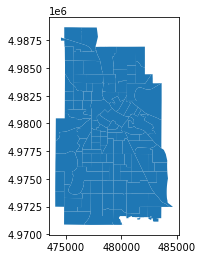

In [31]:
mpls_census_data_gdf.plot()

## Saving as a Shapefile and GeoJSON

In [33]:
# UTM-15N

mpls_census_data_gdf.to_file(r'mpls_census_data_UTM.shp') # Save shapefile
mpls_census_data_gdf.to_file(r'mpls_census_data_UTM.geojson', 
                                                 driver='GeoJSON') # Save GeoJSON

# WGS84

mpls_census_data_gdf.to_crs('EPSG:4326').to_file(r'mpls_census_data_WGS.shp') # Save shapefile
mpls_census_data_gdf.to_crs('EPSG:4326').to_file(r'mpls_census_data_WGS.geojson',
                                                 driver='GeoJSON') # Save GeoJSON

C:\Users\HAL\miniconda3\envs\geog5531\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HAL\miniconda3\envs\geog5531\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  if __name__ == '__main__':
